In [1]:
import geopandas as gpd
import mapclassify

In [5]:
ma = gpd.read_file("../data/MA_Municipios_2022.zip")
ma

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,2100055,Açailândia,MA,5805.159,"POLYGON ((-47.40208 -5.03469, -47.47673 -5.046..."
1,2100105,Afonso Cunha,MA,371.338,"POLYGON ((-43.28145 -4.31924, -43.42924 -4.223..."
2,2100154,Água Doce do Maranhão,MA,442.292,"POLYGON ((-42.17657 -2.84415, -42.17639 -2.844..."
3,2100204,Alcântara,MA,1167.964,"MULTIPOLYGON (((-44.57175 -2.21957, -44.56274 ..."
4,2100303,Aldeias Altas,MA,1942.121,"POLYGON ((-43.36510 -4.64627, -43.36676 -4.644..."
...,...,...,...,...,...
212,2112803,Viana,MA,1166.745,"POLYGON ((-45.01946 -3.27966, -45.01933 -3.279..."
213,2112852,Vila Nova dos Martírios,MA,1190.008,"POLYGON ((-48.11625 -5.26522, -48.11834 -5.265..."
214,2112902,Vitória do Mearim,MA,716.719,"POLYGON ((-44.92336 -3.71341, -44.92354 -3.712..."
215,2113009,Vitorino Freire,MA,1193.385,"POLYGON ((-45.26219 -4.13840, -45.26175 -4.139..."


In [6]:
mapclassify.EqualInterval(ma['AREA_KM2'], k=5)

EqualInterval

      Interval         Count
----------------------------
[   79.21,  2691.60] |   190
( 2691.60,  5303.99] |    17
( 5303.99,  7916.38] |     5
( 7916.38, 10528.77] |     3
(10528.77, 13141.16] |     2

In [7]:
mapclassify.Quantiles(ma['AREA_KM2'], k=5)

Quantiles

      Interval         Count
----------------------------
[   79.21,   447.17] |    44
(  447.17,   743.53] |    43
(  743.53,  1166.17] |    43
( 1166.17,  1928.88] |    43
( 1928.88, 13141.16] |    44

In [8]:
mapclassify.JenksCaspall(ma['AREA_KM2'], k=5)

JenksCaspall

      Interval         Count
----------------------------
[   79.21,   591.62] |    63
(  591.62,  1144.15] |    65
( 1144.15,  2284.22] |    57
( 2284.22,  4837.17] |    19
( 4837.17, 13141.16] |    13

o natural breaks é mais proximo desse aqui

In [10]:
mapclassify.FisherJenks(ma['AREA_KM2'], k=5)

FisherJenks

      Interval         Count
----------------------------
[   79.21,  1193.38] |   136
( 1193.38,  2720.27] |    55
( 2720.27,  5201.93] |    16
( 5201.93,  8861.72] |     8
( 8861.72, 13141.16] |     2

In [11]:
cl = mapclassify.FisherJenks(ma['AREA_KM2'], k=5)
cl

FisherJenks

      Interval         Count
----------------------------
[   79.21,  1193.38] |   136
( 1193.38,  2720.27] |    55
( 2720.27,  5201.93] |    16
( 5201.93,  8861.72] |     8
( 8861.72, 13141.16] |     2

In [12]:
type(cl)

mapclassify.classifiers.FisherJenks

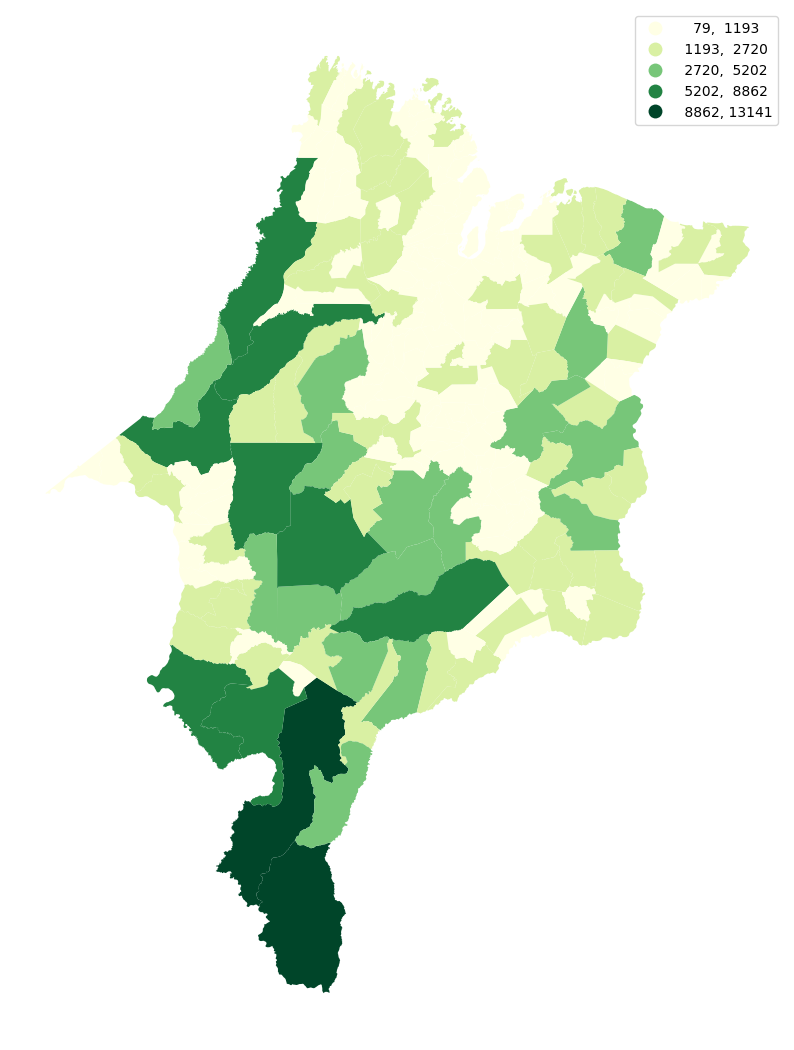

In [13]:
ax = ma.plot(
    column="AREA_KM2",  # Data to plot
    scheme="naturalbreaks",  # Classification scheme
    cmap="YlGn",  # Color palette
    legend=True,  # Add legend
   legend_kwds={"fmt": "{:.0f}"},  # Remove decimals in legend
    figsize=(10,100)
)
ax.set_axis_off();

# Referências

https://geographicdata.science/book/notebooks/05_choropleth.html